# **Telecom X - Análise de Churn**

---

#📌 **Extração**

## Importação das bibliotecas

In [1]:
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

## Extração dos dados

In [53]:


dados = 'TelecomX_Data.json'
df = pd.read_json(dados)
df_normalizado = json_normalize(df.to_dict(orient='records'), sep='_')

colunas_churn = [
    'customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
    'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines',
    'internet_InternetService', 'internet_OnlineSecurity',
    'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'account_Contract',
    'account_Charges_Monthly', 'account_PaymentMethod', 'account_Charges_Total'
]
df_analise = df_normalizado[colunas_churn].copy()


df_analise = df_analise[df_analise['Churn'].isin(['Yes', 'No'])]
df_analise['account_Charges_Total'] = pd.to_numeric(df_analise['account_Charges_Total'], errors='coerce')
df_analise = df_analise.dropna()
df_analise.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_Charges_Monthly,account_PaymentMethod,account_Charges_Total
0,0002-ORFBO,No,Female,0,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,65.6,Mailed check,593.30
1,0003-MKNFE,No,Male,0,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,59.9,Mailed check,542.40
2,0004-TLHLJ,Yes,Male,0,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,73.9,Electronic check,280.85
3,0011-IGKFF,Yes,Male,1,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,98.0,Electronic check,1237.85
4,0013-EXCHZ,Yes,Female,1,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,83.9,Mailed check,267.40


# 🔧 **Transformação**

## Seleção das colunas relevantes
Selecionamos apenas os campos necessários para a análise de churn.

In [49]:
colunas_churn = [
    'customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
    'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines',
    'internet_InternetService', 'internet_OnlineSecurity',
    'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'account_Contract',
    'account_Charges_Monthly', 'account_PaymentMethod', 'account_Charges_Total'
]
df_analise = df_normalizado[colunas_churn].copy()

df_analise.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_Charges_Monthly,account_PaymentMethod,account_Charges_Total
0,0002-ORFBO,No,Female,0,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,65.6,Mailed check,593.3
1,0003-MKNFE,No,Male,0,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,59.9,Mailed check,542.4
2,0004-TLHLJ,Yes,Male,0,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,73.9,Electronic check,280.85
3,0011-IGKFF,Yes,Male,1,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,98.0,Electronic check,1237.85
4,0013-EXCHZ,Yes,Female,1,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,83.9,Mailed check,267.4


## Adição da coluna Contas_Diarias
Vamos adicionar a coluna "Contas_Diarias"

In [50]:
df_analise['Contas_Diarias'] = (df_analise['account_Charges_Monthly'] / 30).round(2)
df_analise.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_Charges_Monthly,account_PaymentMethod,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,65.6,Mailed check,593.3,2.19
1,0003-MKNFE,No,Male,0,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,59.9,Mailed check,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,73.9,Electronic check,280.85,2.46
3,0011-IGKFF,Yes,Male,1,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,98.0,Electronic check,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,83.9,Mailed check,267.4,2.80


## Tratamento dos dados
Convertendo tipos, lidando com valores nulos e padronizando os dados.

In [51]:
df_analise = df_analise[df_analise['Churn'].isin(['Yes', 'No'])]

df_analise['customer_SeniorCitizen'] = df_analise['customer_SeniorCitizen'].astype(int)
df_analise['account_Charges_Monthly'] = pd.to_numeric(df_analise['account_Charges_Monthly'], errors='coerce')
df_analise['account_Charges_Total'] = pd.to_numeric(df_analise['account_Charges_Total'], errors='coerce')
df_analise['account_Charges_Total'] = df_analise['account_Charges_Total'].fillna(0)

/tmp/ipython-input-51-3305313134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analise['customer_SeniorCitizen'] = df_analise['customer_SeniorCitizen'].astype(int)
/tmp/ipython-input-51-3305313134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analise['account_Charges_Monthly'] = pd.to_numeric(df_analise['account_Charges_Monthly'], errors='coerce')
/tmp/ipython-input-51-3305313134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [52]:
colunas_binarias = [
    'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'phone_PhoneService'
]

df_analise[colunas_binarias] = (
    df_analise[colunas_binarias]
    .replace({
        'Yes': 1,
        'No': 0,
        'No phone service': 0,
        'No internet service': 0
    })
    .astype(int)
)

df_analise['Churn'] = df_analise['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)

/tmp/ipython-input-52-3248433698.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({
/tmp/ipython-input-52-3248433698.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analise[colunas_binarias] = (
/tmp/ipython-input-52-3248433698.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

# 📊 **Analise e Carga**

## Análise descritiva
Estatísticas básicas e análise de distribuição de churn.

In [7]:
df_analise.describe().round(2)

,Churn,customer_SeniorCitizen,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
count,7043.00,7043.00,7043.00,7043.0,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.27,0.16,32.37,0.9,0.42,0.29,0.34,0.34,0.29,0.38,0.39,64.76,2279.73,2.16
std,0.44,0.37,24.56,0.3,0.49,0.45,0.48,0.48,0.45,0.49,0.49,30.09,2266.79,1.00
min,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,0.00,0.61
25%,0.00,0.00,9.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35.50,398.55,1.18
50%,0.00,0.00,29.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,70.35,1394.55,2.34
75%,1.00,0.00,55.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,89.85,3786.60,2.99
max,1.00,1.00,72.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,118.75,8684.80,3.96


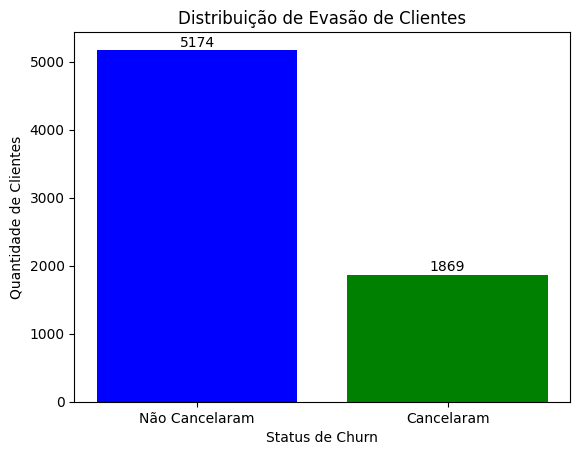

In [8]:
contagem_churn = df_analise['Churn'].value_counts()
plt.bar(['Não Cancelaram', 'Cancelaram'], contagem_churn, color=['blue', 'green'])
plt.title('Distribuição de Evasão de Clientes')
plt.ylabel('Quantidade de Clientes')
plt.xlabel('Status de Churn')
for i, valor in enumerate(contagem_churn):
    plt.text(i, valor + 50, str(valor), ha='center')
plt.show()

## Análise por genero

In [9]:
agrup_genero = df_analise.groupby(['customer_gender', 'Churn']).size().unstack().fillna(0)
agrup_genero

Churn,0,1
customer_gender,,
Female,2549,939
Male,2625,930


## Análise por senioridade

In [22]:
agrup_senioridade = df_analise.groupby(['customer_SeniorCitizen', 'Churn']).size().unstack().fillna(0)
agrup_senioridade

Churn,0,1
customer_SeniorCitizen,,
0,4508,1393
1,666,476


## Análise de Planos Contratados
Vamos analisar quantos clientes contrataram cada plano e quantos deles cancelaram ou permaneceram com os serviços.

In [11]:
planos = [
    'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'phone_PhoneService'
]

tabelas = []

for plano in planos:
    tab = df_analise.groupby([plano, 'Churn']).size().unstack(fill_value=0)
    tab['Total'] = tab[0] + tab[1]
    tab.columns = ['Sem_Churn', 'Com_Churn', 'Total']
    tab['Plano'] = plano
    tab['Contratado'] = tab.index
    tabelas.append(tab.reset_index(drop=True))

tabela_planos = pd.concat(tabelas, ignore_index=True)
tabela_contratados = tabela_planos[tabela_planos['Contratado'] == 1].reset_index(drop=True)
tabela_contratados = tabela_contratados[['Plano', 'Total', 'Sem_Churn', 'Com_Churn']]
tabela_contratados.sort_values('Total', ascending=False)

,Plano,Total,Sem_Churn,Com_Churn
7,phone_PhoneService,6361,4662,1699
0,phone_MultipleLines,2971,2121,850
6,internet_StreamingMovies,2732,1914,818
5,internet_StreamingTV,2707,1893,814
2,internet_OnlineBackup,2429,1906,523
3,internet_DeviceProtection,2422,1877,545
4,internet_TechSupport,2044,1734,310
1,internet_OnlineSecurity,2019,1724,295


## Análise de Métodos de Pagamento


In [12]:
df_analise.groupby(['account_PaymentMethod', 'Churn']).size().unstack().fillna(0)

Churn,0,1
account_PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


## Análise de Tempo de contrato

In [13]:
agrup_tempo_contrato = df_analise.groupby(['customer_tenure', 'Churn']).size().unstack().fillna(0)
agrup_tempo_contrato

Churn,0,1
customer_tenure,,
0,11.0,0.0
1,233.0,380.0
2,115.0,123.0
3,106.0,94.0
4,93.0,83.0
...,...,...
68,91.0,9.0
69,87.0,8.0
70,108.0,11.0


In [14]:
tabela = df_analise.groupby(['customer_tenure', 'Churn']).size().unstack().fillna(0)
tabela['% churn'] = (tabela[1] / (tabela[0] + tabela[1]) * 100).round(2)
tabela_percentual = tabela[[0, 1, '% churn']]

tabela_percentual.head(10)

Churn,0,1,% churn
customer_tenure,,,
0,11.0,0.0,0.00
1,233.0,380.0,61.99
2,115.0,123.0,51.68
3,106.0,94.0,47.00
4,93.0,83.0,47.16
5,69.0,64.0,48.12
6,70.0,40.0,36.36
7,80.0,51.0,38.93
8,81.0,42.0,34.15


## Analise de Custo total mensal

In [15]:
media_gasto = df_analise.groupby(['Churn'])[['account_Charges_Monthly', 'Contas_Diarias']].mean().round(2)
media_gasto

,account_Charges_Monthly,Contas_Diarias
Churn,,
0,61.27,2.04
1,74.44,2.48


## Analise de Custo mensal e Custo Diario por tempo de contrato

In [16]:
media_gasto = df_analise.groupby(['customer_tenure', 'Churn'])[['account_Charges_Monthly', 'Contas_Diarias']].mean().round(2)

# reorganizar a tabela (Churn vira coluna)
media_gasto_descompactada = media_gasto.unstack().swaplevel(axis=1).sort_index(axis=1)
media_gasto_descompactada

Churn                        0                                      1  \
                Contas_Diarias account_Charges_Monthly Contas_Diarias   
customer_tenure                                                         
0                         1.38                   41.42            NaN   
1                         1.26                   37.91           1.94   
2                         1.60                   47.88           2.20   
3                         1.70                   50.92           2.20   
4                         1.52                   45.65           2.35   
...                        ...                     ...            ...   
68                        2.36                   70.88           3.27   
69                        2.27                   68.19           3.32   
70                        2.47                   74.21           3.26   
71                        2.43                   72.95           3.17   
72                        2.68                   80.42           3.23   

Churn                                    
                account_Charges_Monthly  
customer_tenure                          
0                                   NaN  
1                                 58.20  
2                                 65.92  
3                                 66.01  
4                                 70.64  
...                                 ...  
68                                98.01  
69                                99.45  
70                                97.65  
71                                95.13  
72                                96.88  

[73 rows x 4 columns]

## Analise de Custo Diario

In [17]:
# 1- lista de planos a serem analisados
planos = [
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'phone_PhoneService'
]

# 2 - criar uma lista para armazenar os dados
Contas_Diarias_churn = []

# 3 - Criar o loop
for plano in planos:
    # filtra clientes que contrataram o plano
    contratados = df_analise[df_analise[plano] == 1]

    # ticket médio geral
    ticket_total = contratados['account_Charges_Monthly'].mean()

    # custo médio diário de quem deu churn
    contas_diaria_clientes_churn = contratados[contratados['Churn'] == 1]['Contas_Diarias'].mean()

    # custo médio diário de quem não deu churn
    contas_diaria_clientes_ativos = contratados[contratados['Churn'] == 0]['Contas_Diarias'].mean()

    # calcular a diferença
    variação_churn_vs_artivos = (contas_diaria_clientes_churn - contas_diaria_clientes_ativos) / contas_diaria_clientes_ativos * 100

    # adiciona ao dicionário
    Contas_Diarias_churn.append({
        'Plano': plano,
        'Contas_Diarias_Sem_Churn': round(contas_diaria_clientes_ativos, 2),
        'Contas_Diarias_Com_Churn': round(contas_diaria_clientes_churn, 2),
        'Variação_Churn_vs_Ativos': round(variação_churn_vs_artivos, 2)
    })

# criaa um DataFrame com os resultados
df_Contas_Diarias = pd.DataFrame(Contas_Diarias_churn)
df_Contas_Diarias.sort_values('Variação_Churn_vs_Ativos', ascending=False, inplace=True)

df_Contas_Diarias.head(10)


,Plano,Contas_Diarias_Sem_Churn,Contas_Diarias_Com_Churn,Variação_Churn_vs_Ativos
7,phone_PhoneService,2.11,2.60,23.61
0,phone_MultipleLines,2.64,2.97,12.44
4,internet_TechSupport,2.67,2.81,5.27
3,internet_DeviceProtection,2.79,2.94,5.23
2,internet_OnlineBackup,2.74,2.87,4.46
1,internet_OnlineSecurity,2.61,2.72,4.11
5,internet_StreamingTV,2.93,3.02,2.87
6,internet_StreamingMovies,2.93,3.00,2.37


# 📈 Gráficos

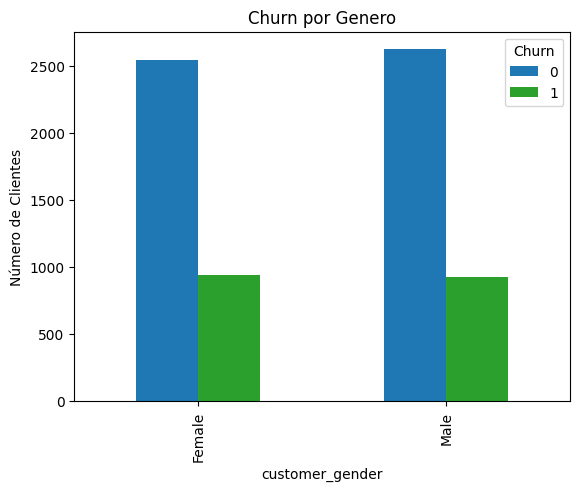

In [19]:
# churn por genero
genero_df = df_analise.groupby(['customer_gender', 'Churn']).size().unstack().fillna(0)

genero_df.plot(
    kind='bar',
    color=['#1f77b4', '#2ca02c'],
    title="Churn por Genero"
).set_ylabel("Número de Clientes")

plt.show()


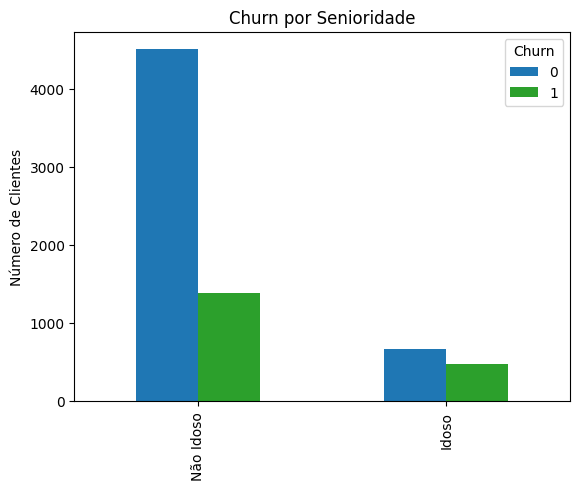

In [21]:
# churn por senioridade

senioridade_df = df_analise.groupby(['customer_SeniorCitizen', 'Churn']).size().unstack().fillna(0)
senioridade_df.index = ['Nao Idoso', 'Idoso']

senioridade_df.plot(
    kind='bar',
    color=['#1f77b4', '#2ca02c'],
    title="Churn por Senioridade"
).set_ylabel("Número de Clientes")

plt.show()


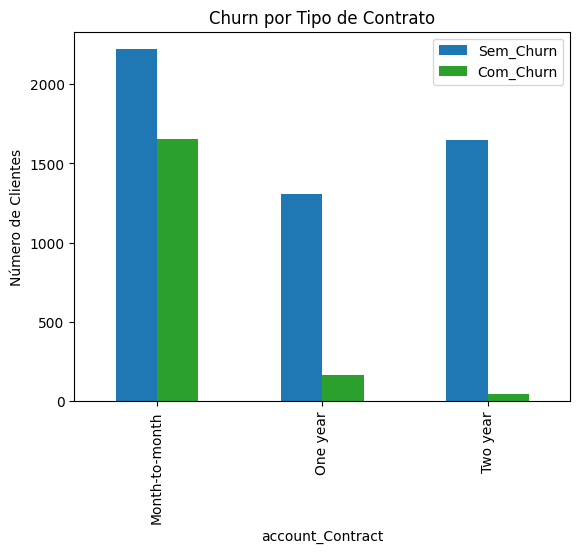

In [23]:
# churn por tipo de contrato
contratos_df = df_analise.groupby(['account_Contract', 'Churn']).size().unstack().fillna(0)
contratos_df.columns = ['Sem_Churn', 'Com_Churn']

contratos_df[['Sem_Churn', 'Com_Churn']].plot(
    kind='bar',
    color=['#1f77b4', '#2ca02c'],
    title="Churn por Tipo de Contrato"
).set_ylabel("Número de Clientes")

plt.show()

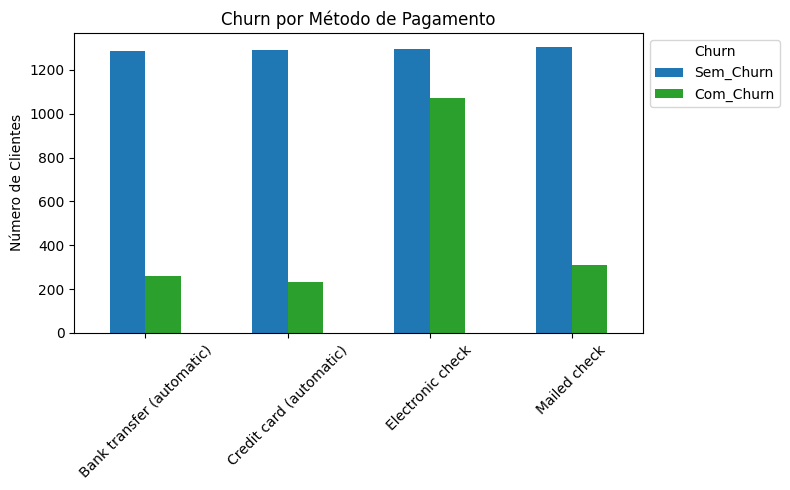

In [35]:
# churn por método de pagamento

import matplotlib.pyplot as plt

pagamento_df = df_analise.groupby(['account_PaymentMethod', 'Churn']).size().unstack().fillna(0)
pagamento_df.columns = ['Sem_Churn', 'Com_Churn']

ax = pagamento_df.plot(
    kind='bar',
    color=['#1f77b4', '#2ca02c'],
    figsize=(8, 5)
)

plt.title("Churn por Método de Pagamento")
plt.ylabel("Número de Clientes")
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(title="Churn", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


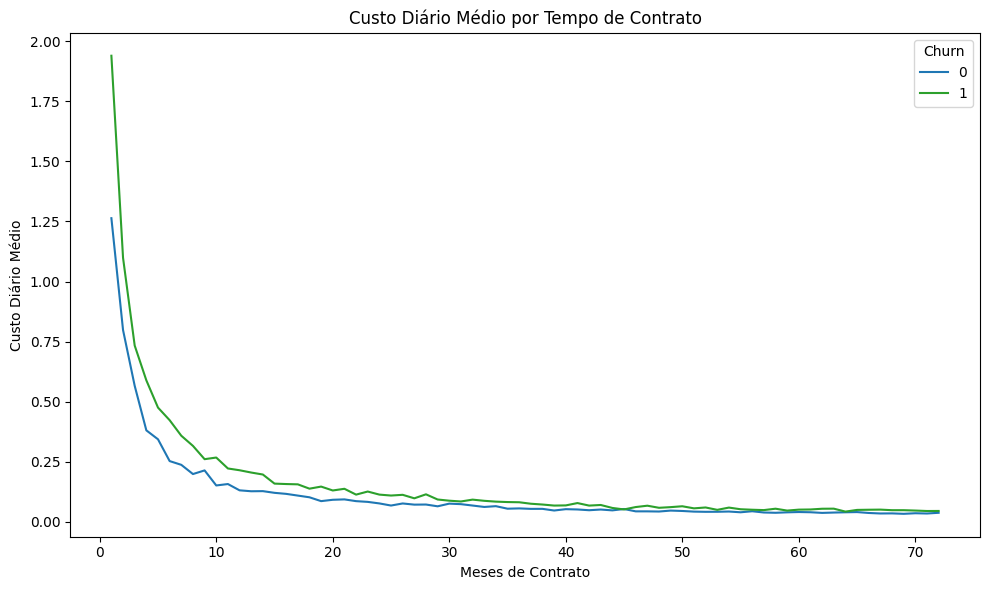

In [41]:
# custo diário médio por tempo de contrato
df_analise_filtrado = df_analise[df_analise['customer_tenure'] >= 1].copy()

df_analise_filtrado['Contas_Diarias'] = df_analise_filtrado['account_Charges_Monthly'] / (df_analise_filtrado['customer_tenure'] * 30)

tempo_df = df_analise_filtrado.groupby(['customer_tenure', 'Churn'])['Contas_Diarias'].mean().unstack().fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(tempo_df[0], label='0', color='#1f77b4')  # Sem churn
plt.plot(tempo_df[1], label='1', color='#2ca02c')  # Com churn

plt.title("Custo Diário Médio por Tempo de Contrato")
plt.xlabel("Meses de Contrato")
plt.ylabel("Custo Diário Médio")
plt.legend(title="Churn", loc='upper right')
plt.tight_layout()
plt.show()


# 📄 Relatório Final

### Objetivo

Esta análise tem como objetivo identificar os principais fatores que levam ao cancelamento de planos (churn) por parte dos clientes da Telecom X. Além disso, propomos possíveis ações que podem ser adotadas para mitigar esse comportamento e aumentar a retenção de clientes.

---

### Preparação dos Dados

Antes da análise, realizamos a preparação da base de dados conforme as etapas abaixo:

1. **Importação das bibliotecas**: Pandas, Matplotlib e Seaborn.  
2. **Leitura dos dados**: Base original em JSON, normalizada e convertida para DataFrame.  
3. **Seleção de colunas relevantes** para análise do churn.  
4. **Criação da variável `Contas_Diarias`**, representando o custo diário de cada cliente.  
5. **Conversão de variáveis categóricas** ("Sim"/"Não") para formato binário, tratamento de valores ausentes e padronização da base.

---

### Visão Geral da Base

A base contém **7.043 clientes**, dos quais **1.869 deram churn**, representando aproximadamente **27% da base total**.

---

### Análise por Gênero

- A distribuição por gênero está praticamente equilibrada entre os clientes com e sem churn.
- Não há indícios de correlação significativa entre gênero e o cancelamento dos planos.

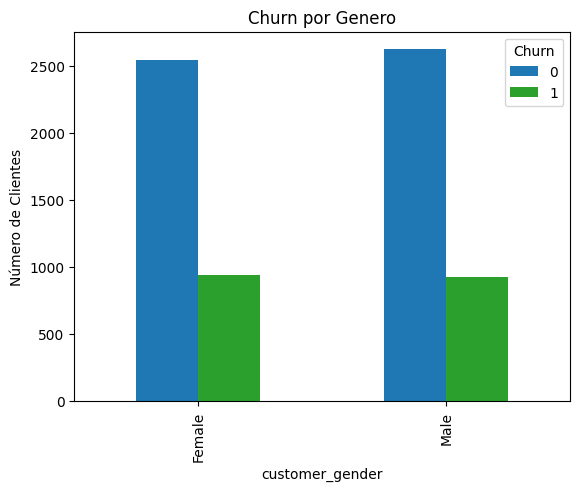

In [42]:
# churn por genero
genero_df = df_analise.groupby(['customer_gender', 'Churn']).size().unstack().fillna(0)

genero_df.plot(
    kind='bar',
    color=['#1f77b4', '#2ca02c'],
    title="Churn por Genero"
).set_ylabel("Número de Clientes")

plt.show()

📌 Conclusão: Gênero **não é uma variável relevante** nesta base.

---

### Análise por Senioridade

- Apenas **16% da base** possui 65 anos ou mais.
- Dentre os clientes que deram churn, apenas **~25%** pertencem ao grupo 65+.

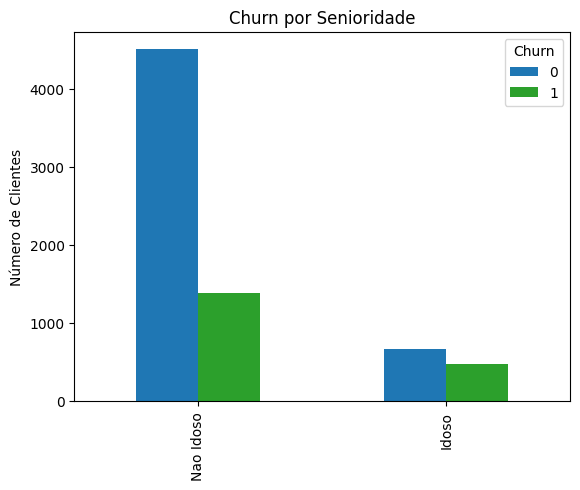

In [43]:
# churn por senioridade

senioridade_df = df_analise.groupby(['customer_SeniorCitizen', 'Churn']).size().unstack().fillna(0)
senioridade_df.index = ['Nao Idoso', 'Idoso']

senioridade_df.plot(
    kind='bar',
    color=['#1f77b4', '#2ca02c'],
    title="Churn por Senioridade"
).set_ylabel("Número de Clientes")

plt.show()

📌 Conclusão: Senioridade **também não demonstra relação** com o churn nesta amostra.

---

### Planos Contratados

- O plano de telefone possui o maior volume absoluto de churn, mas também é o mais popular.
- Não há evidências de que um plano específico esteja diretamente relacionado ao cancelamento.

In [47]:
tabela_contratados.sort_values('Total', ascending=False)

,Plano,Total,Sem_Churn,Com_Churn
7,phone_PhoneService,6361,4662,1699
0,phone_MultipleLines,2971,2121,850
6,internet_StreamingMovies,2732,1914,818
5,internet_StreamingTV,2707,1893,814
2,internet_OnlineBackup,2429,1906,523
3,internet_DeviceProtection,2422,1877,545
4,internet_TechSupport,2044,1734,310
1,internet_OnlineSecurity,2019,1724,295


📌 Conclusão: A análise por planos requer cautela, uma vez que o volume de cancelamentos está diretamente relacionado à representatividade de cada plano na base de clientes

---



### Métodos de Pagamento

- O método **"Electronic check"** é responsável por mais de **57% dos cancelamentos**.
- Clientes com este método possuem churn desproporcional em relação ao restante da base.


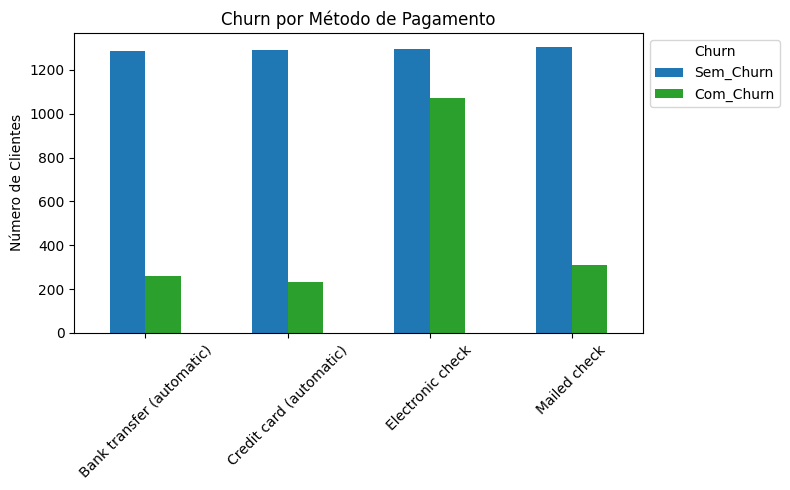

In [45]:
# churn por método de pagamento

import matplotlib.pyplot as plt

pagamento_df = df_analise.groupby(['account_PaymentMethod', 'Churn']).size().unstack().fillna(0)
pagamento_df.columns = ['Sem_Churn', 'Com_Churn']

ax = pagamento_df.plot(
    kind='bar',
    color=['#1f77b4', '#2ca02c'],
    figsize=(8, 5)
)

plt.title("Churn por Método de Pagamento")
plt.ylabel("Número de Clientes")
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(title="Churn", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

📌 Conclusão: Método de pagamento é um **fator que influencia** na evasão de clientes.

---

### Tempo de Contrato

- A maioria dos cancelamentos ocorre **entre o 1º e 2º mês de contrato**.
- Esse comportamento sugere churn precoce e possível desalinhamento de expectativas.


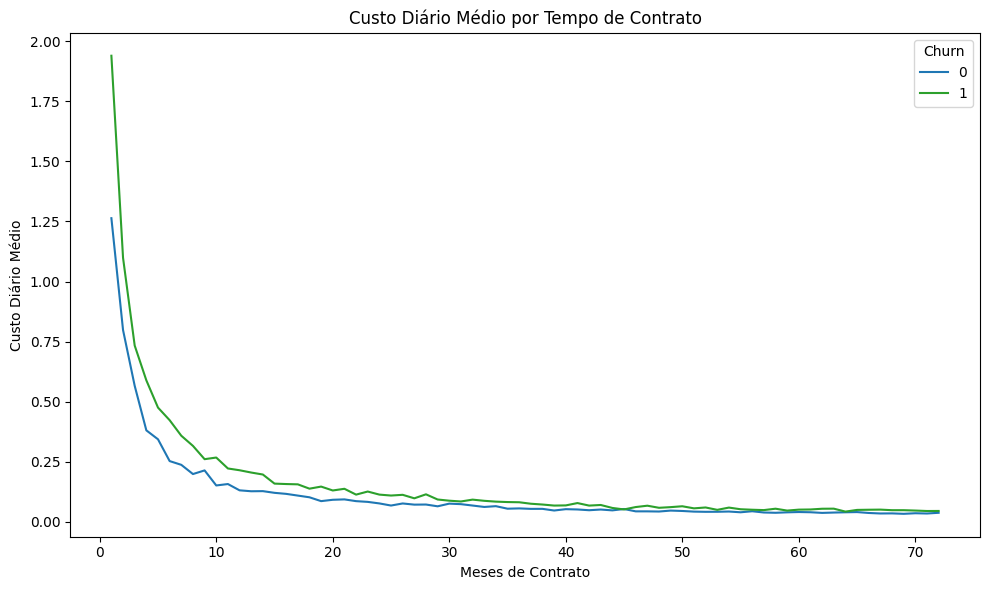

In [46]:
# custo diário médio por tempo de contrato
df_analise_filtrado = df_analise[df_analise['customer_tenure'] >= 1].copy()

df_analise_filtrado['Contas_Diarias'] = df_analise_filtrado['account_Charges_Monthly'] / (df_analise_filtrado['customer_tenure'] * 30)

tempo_df = df_analise_filtrado.groupby(['customer_tenure', 'Churn'])['Contas_Diarias'].mean().unstack().fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(tempo_df[0], label='0', color='#1f77b4')  # sem churn
plt.plot(tempo_df[1], label='1', color='#2ca02c')  # com churn

plt.title("Custo Diário Médio por Tempo de Contrato")
plt.xlabel("Meses de Contrato")
plt.ylabel("Custo Diário Médio")
plt.legend(title="Churn", loc='upper right')
plt.tight_layout()
plt.show()

📌 Conclusão: Contratos mais longos tendem a apresentar **maior retenção**.

---


### Análise de Custo

- Clientes que cancelaram apresentam, em média, custos **mais elevados** em todas as métricas: custo total, mensal e diário.
- Essa diferença persiste ao segmentar por tempo de contrato e por tipo de serviço.
- Nos planos de internet, a variação de custo entre churn e não churn foi de até **5,2%**.
- Em planos de telefonia, a variação foi **superior a 12%**, chegando a **23%** no plano base de uma linha.


In [48]:
df_Contas_Diarias.head(10)

,Plano,Contas_Diarias_Sem_Churn,Contas_Diarias_Com_Churn,Variação_Churn_vs_Ativos
7,phone_PhoneService,2.11,2.60,23.61
0,phone_MultipleLines,2.64,2.97,12.44
4,internet_TechSupport,2.67,2.81,5.27
3,internet_DeviceProtection,2.79,2.94,5.23
2,internet_OnlineBackup,2.74,2.87,4.46
1,internet_OnlineSecurity,2.61,2.72,4.11
5,internet_StreamingTV,2.93,3.02,2.87
6,internet_StreamingMovies,2.93,3.00,2.37


📌 Conclusão: O **preço é o principal fator associado ao churn**. Planos com maior custo tendem a ter maior evasão.

---

### Conclusões e Recomendações

- O comportamento de churn está fortemente associado ao **custo elevado**, especialmente em contratos mensais.
- Métodos de pagamento como **"Electronic check"** apresentam correlação alta com cancelamentos.
- A concentração de churn nos primeiros meses sugere a necessidade de **reforçar o onboarding e os primeiros contatos** com o cliente.
- Recomendação:
  - Revisar a estrutura de preços dos planos;
  - Oferecer incentivos para fidelização em contratos mais longos;
  - Priorizar formas de pagamento mais confiáveis e vinculadas;
  - Monitorar e atuar nos primeiros 90 dias de contrato com ações preventivas.

---